In [1]:
import cv2
import numpy as np

from skimage.measure import label, regionprops
import matplotlib.pyplot as plt


In [2]:
# Reading multiple images
obj_1_image = cv2.imread('./Obj_1/obj1__0.jpg')  # Replace with the correct file path
obj_2_image = cv2.imread('./Obj_2/obj2__0.jpg')  # Replace with the correct file path
obj_3_image = cv2.imread('./Obj_3/obj3__0.jpg')  # Replace with the correct file path

# Optional: Convert images to RGB if needed for visualization with Matplotlib
image1 = cv2.cvtColor(obj_1_image, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(obj_2_image, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(obj_3_image, cv2.COLOR_BGR2RGB)



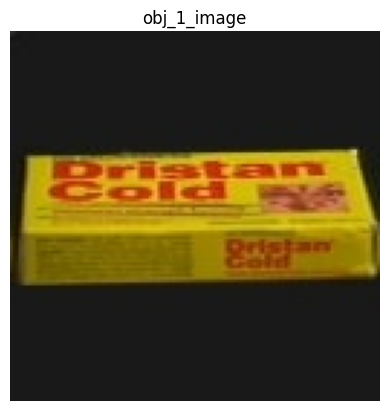

In [3]:
plt.imshow(image1)
plt.title('obj_1_image')
plt.axis('off')
plt.show()

In [ ]:
# Convert the second image to grayscale
image1_g = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)

# Convert the grayscale image to a binary image (thresholding)
_, image1_b = cv2.threshold(image1_g, 127, 255, cv2.THRESH_BINARY)
# image1_b[top_Threshold:bottom_Threshold] = 0


# Display the binary image
plt.imshow(image1_b, cmap='gray')
plt.title('Missing bottle Binary image')
plt.axis('off')  # Hide axis for better visualization
plt.show()


In [ ]:
# Convert the second image to grayscale
image2_g = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

# Convert the grayscale image to a binary image (thresholding)
_, image2_b = cv2.threshold(image2_g, 127, 255, cv2.THRESH_BINARY)
# I_m[:, 80:121] = 0
# image2_b[top_Threshold:bottom_Threshold] = 0

# Display the binary image
plt.imshow(image2_b, cmap='gray')
plt.title('Missing label Binary image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

In [ ]:
# Convert the third image to grayscale
image3_g = cv2.cvtColor(image3, cv2.COLOR_RGB2GRAY)

# Convert the grayscale image to a binary image (thresholding)
_, image3_b = cv2.threshold(image3_g, 127, 255, cv2.THRESH_BINARY)
# image3_b[top_Threshold:bottom_Threshold] = 0


# Display the binary image
plt.imshow(image3_b, cmap='gray')
plt.title('White label Binary image')
plt.axis('off')  # Hide axis for better visualization
plt.show()

In [ ]:
# I1 is the binary image image4_b
I1 = image1_b

# Calculate the area (number of white pixels)
Area_obj_1 = np.sum(I1 == 255)

# Display the area
print(Area_obj_1)

In [ ]:
# I1 is the binary image image4_b
I2 = image2_b

# Calculate the area (number of white pixels)
Area_obj_2 = np.sum(I2 == 255)

# Display the area
print(Area_obj_2)

In [ ]:
# I1 is the binary image image4_b
I3 = image3_b

# Calculate the area (number of white pixels)
Area_obj_3 = np.sum(I3 == 255)

# Display the area
print(Area_obj_3)

In [ ]:
# Reading multiple images
image_test = cv2.imread('/content/drive/MyDrive/Assignment1/Question3/test/obj3__45.jpg')  # Replace with the correct file path
image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)

# Convert the fourth image to grayscale
image_test_g = cv2.cvtColor(image_test, cv2.COLOR_RGB2GRAY)

# Convert the grayscale image to a binary image (thresholding)
_, image_test_b = cv2.threshold(image_test_g, 127, 255, cv2.THRESH_BINARY)
# image_test_b[top_Threshold:bottom_Threshold] = 0

# I_test is the binary image image_test_b
I_test = image_test_b

# Display the binary image
# plt.imshow(image_test_b, cmap='gray')
# plt.title('test Binary image')
# plt.axis('off')  # Hide axis for better visualization
# plt.show()


# Calculate the area (number of white pixels)
Area_test = np.sum(I_test == 255)

# Display the area
# print(Area_test)

difference_array=[abs(Area_test-Area_obj_1),abs(Area_test-Area_obj_2),abs(Area_test-Area_obj_3)]

min_diff=min(difference_array)
index= difference_array.index(min_diff)
print(difference_array)
if(index==0):
  print("The object is obj1")
elif(index==1):
  print("The object is obj2")
else:
  print("The object is obj3")